# DAT210x - Programming with Python for DS

## Module5- Lab8

In [62]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [63]:
def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

### The Assignment

Load up the data here into a variable called `X`. As usual, do a .describe and a print of your dataset and compare it to the dataset loaded in a text file or in a spread sheet application:

In [64]:
# .. your code here ..
X = pd.read_csv('Datasets/life_expectancy.csv',sep='\t' )
X

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3
5,1980,70.7,78.1,63.8,72.5
6,1981,71.1,78.4,64.5,73.2
7,1982,71.5,78.7,65.1,73.6
8,1983,71.6,78.7,65.2,73.5
9,1984,71.8,78.7,65.3,73.6


In [65]:
X.describe()
X.dtypes

Year             int64
WhiteMale      float64
WhiteFemale    float64
BlackMale      float64
BlackFemale    float64
dtype: object

Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [96]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

whitemale = X[['WhiteMale']]
whitemaleyear = X[['Year']]




In [97]:
whitemaleyear.shape

(40, 1)

In [104]:
wtrain,wtest, wtrainy,wtesty = train_test_split(whitemale,whitemaleyear, test_size=0.3, random_state=7)


In [105]:
wtrainy.shape
wtest.shape

(12, 1)

In [106]:


lr = linear_model.LinearRegression()
lr.fit(wtrain,wtrainy)
score = lr.score(wtest,wtesty)
print(score)
printlr.predict([[2014]])

0.869839541777


In [66]:
# .. your code here ..
from sklearn import linear_model
model = linear_model.LinearRegression()


Slice out your data manually (e.g. don't use `train_test_split`, but actually do the indexing yourself. Set `X_train` to be year values LESS than 1986, and `y_train` to be corresponding 'WhiteMale' age values. You might also want to read the note about slicing on the bottom of this document before proceeding:

In [67]:
# .. your code here ..
x_train = X[(X.Year < 1986) ]
x_train = x_train[['WhiteMale']]


y_train = X[(X.Year < 1986)]
y_train = y_train[['Year']]
#y_train = y_train.Year

x_test = X[(X.Year >= 1986) ]
x_test = x_test[['WhiteMale']]


y_test = X[(X.Year >= 1986)]
#y_train = y_train[['Year']]
y_test = y_test.Year


In [68]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)
print(type(x_train))
print(type(y_train))

    WhiteMale
0        46.6
1        66.5
2        67.4
3        68.0
4        69.5
5        70.7
6        71.1
7        71.5
8        71.6
9        71.8
10       71.8
    Year
0   1900
1   1950
2   1960
3   1970
4   1975
5   1980
6   1981
7   1982
8   1983
9   1984
10  1985
    WhiteMale
11       71.9
12       72.1
13       72.2
14       72.5
15       72.7
16       72.9
17       73.2
18       73.1
19       73.3
20       73.4
21       73.9
22       74.3
23       74.5
24       74.6
25       74.7
26       74.9
27       74.9
28       75.1
29       75.5
30       75.5
31       75.8
32       76.0
33       76.1
34       76.4
35       76.5
36       76.6
37       76.7
38       76.7
39       76.7
11    1986
12    1987
13    1988
14    1989
15    1990
16    1991
17    1992
18    1993
19    1994
20    1995
21    1996
22    1997
23    1998
24    1999
25    2000
26    2001
27    2002
28    2003
29    2004
30    2005
31    2006
32    2007
33    2008
34    2009
35    2010
36    2011
37    2012
38    2

In [69]:
#model.fit(x_train,y_train)
model.fit(x_train['WhiteMale'].reshape(-1,1),y_train['Year'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
model.score(x_test['WhiteMale'].reshape(-1,1),y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


-0.35411356293676088

In [71]:
model.predict([[2014]])

array([ 8528.93114763])

<IPython.core.display.Javascript object>


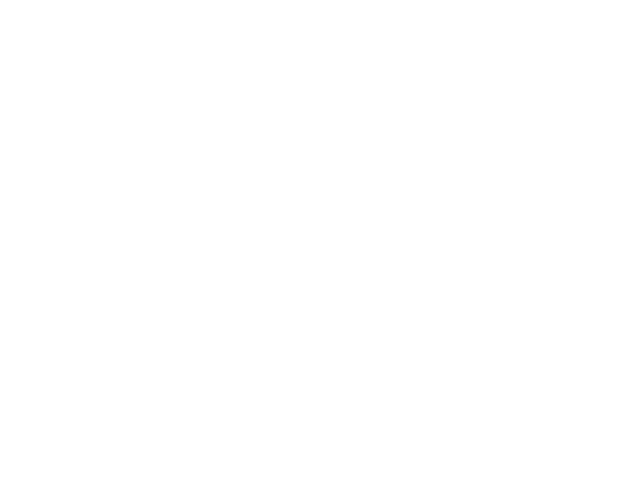

Est 2014 WhiteMale test Life Expectancy:  8528.93114763
Est 2030 WhiteMale test Life Expectancy:  8582.86980847
Est 2045 WhiteMale test Life Expectancy:  8633.43730301


In [72]:
drawLine(model,x_test , y_test, 'WhiteMale test')

Train your model then pass it into `drawLine` with your training set and labels. You can title it 'WhiteMale'. `drawLine` will output to the console a 2014 extrapolation / approximation for what it believes the WhiteMale's life expectancy in the U.S. will be... given the pre-1986 data you trained it with. It'll also produce a 2030 and 2045 extrapolation:

<IPython.core.display.Javascript object>


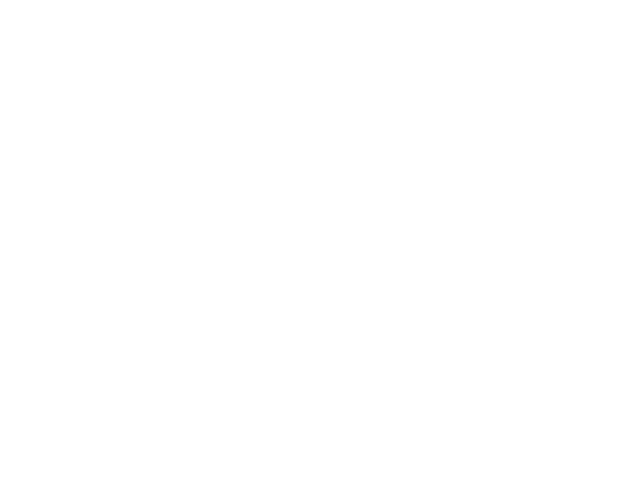

Est 2014 WhiteMale Life Expectancy:  8528.93114763
Est 2030 WhiteMale Life Expectancy:  8582.86980847
Est 2045 WhiteMale Life Expectancy:  8633.43730301


In [73]:
# .. your code here ..
drawLine(model,x_train , y_train, 'WhiteMale')

Print the actual 2014 'WhiteMale' life expectancy from your loaded dataset

In [74]:
# .. your code here ..
X['WhiteMale'][(X.Year == 2014) ]

39    76.7
Name: WhiteMale, dtype: float64

In [75]:
model.predict([[1975]])

array([ 8397.45566183])

Repeat the process, but instead of for WhiteMale, this time select BlackFemale. Create a slice for BlackFemales, fit your model, and then call `drawLine`. Lastly, print out the actual 2014 BlackFemale life expectancy:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


<IPython.core.display.Javascript object>


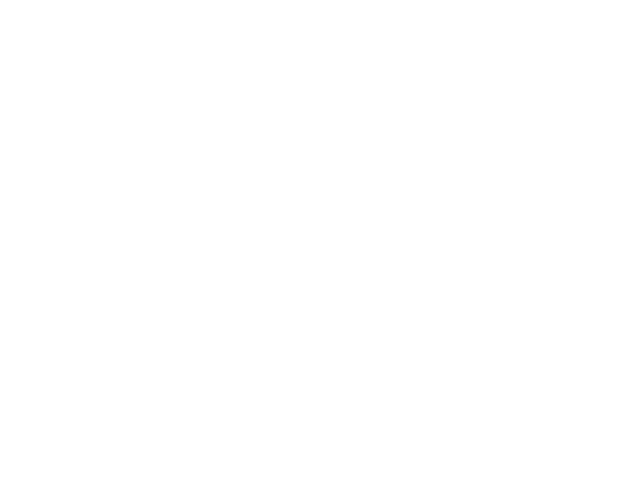

Est 2014 BlackFemale Life Expectancy:  [ 6066.59064702]
Est 2030 BlackFemale Life Expectancy:  [ 6100.27845398]
Est 2045 BlackFemale Life Expectancy:  [ 6131.86077301]


39    78.4
Name: BlackFemale, dtype: float64

In [76]:
# .. your code here .. 
x_train = X[(X.Year < 1986) ]
x_train = x_train[['BlackFemale']]
t = x_train.BlackFemale.reshape(-1,1)

y_train = X[(X.Year < 1986)]
y_train = y_train[['Year']] 

model.fit(x_train['BlackFemale'].reshape(-1,1),y_train)
drawLine(model,x_train , y_train, 'BlackFemale')
X['BlackFemale'][(X.Year == 2014) ]

Lastly, print out a correlation matrix for your entire dataset, and display a visualization of the correlation matrix, just as we described in the visualization section of the course:

In [77]:
print(x_train)
print(y_train)
X.corr()


    BlackFemale
0          33.5
1          62.9
2          66.3
3          68.3
4          71.3
5          72.5
6          73.2
7          73.6
8          73.5
9          73.6
10         73.4
    Year
0   1900
1   1950
2   1960
3   1970
4   1975
5   1980
6   1981
7   1982
8   1983
9   1984
10  1985


,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
Year,1.000000,0.974154,0.913907,0.960635,0.940429
WhiteMale,0.974154,1.000000,0.975164,0.987974,0.985009
WhiteFemale,0.913907,0.975164,1.000000,0.956689,0.994656
BlackMale,0.960635,0.987974,0.956689,1.000000,0.975922
BlackFemale,0.940429,0.985009,0.994656,0.975922,1.000000


<IPython.core.display.Javascript object>


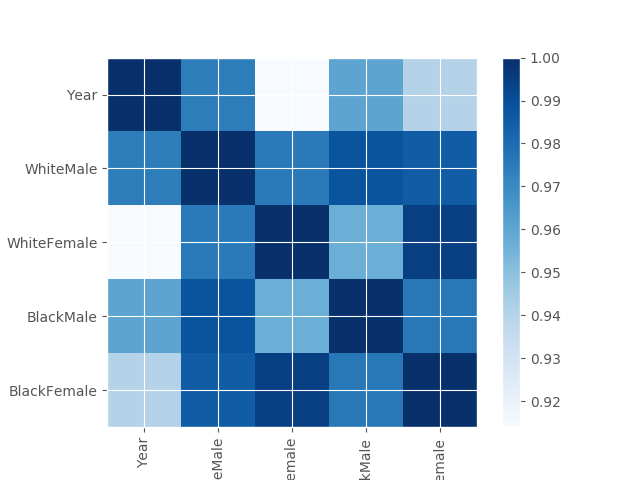

([<matplotlib.axis.YTick at 0x1f1e62e5748>,
 <a list of 5 Text yticklabel objects>)

In [78]:
%matplotlib notebook
plt.imshow(X.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(X.columns))]
plt.xticks(tick_marks, X.columns, rotation='vertical')
plt.yticks(tick_marks, X.columns)

In [79]:
plt.show()

In [80]:
x = X.Year.reshape(-1,1)
x

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


array([[1900],
       [1950],
       [1960],
       [1970],
       [1975],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]], dtype=int64)

In [81]:
type(X[['Year']])

pandas.core.frame.DataFrame

### Notes On Fitting, Scoring, and Predicting:

Here's a hint to help you complete the assignment without pulling your hair out! When you use `.fit()`, `.score()`, and `.predict()` on your model, SciKit-Learn expects your training data to be in spreadsheet (2D Array-Like) form. This means you can't simply pass in a 1D Array (slice) and get away with it.

To properly prep your data, you have to pass in a 2D Numpy Array, or a dataframe. But what happens if you really only want to pass in a single feature?

If you slice your dataframe using `df[['ColumnName']]` syntax, the result that comes back is actually a _dataframe_. Go ahead and do a `type()` on it to check it out. Since it's already a dataframe, you're good -- no further changes needed.

But if you slice your dataframe using the `df.ColumnName` syntax, OR if you call `df['ColumnName']`, the result that comes back is actually a series (1D Array)! This will cause SKLearn to bug out. So if you are slicing using either of those two techniques, before sending your training or testing data to `.fit` / `.score`, do `any_column = my_column.reshape(-1,1)`. 

This will convert your 1D array of `[n_samples]`, to a 2D array shaped like `[n_samples, 1]`. A single feature, with many samples.

If you did something like `my_column = [my_column]`, that would produce an array in the shape of `[1, n_samples]`, which is incorrect because SKLearn expects your data to be arranged as `[n_samples, n_features]`. Keep in mind, all of the above only relates to your `X` or input data, and does not apply to your `y` or labels.